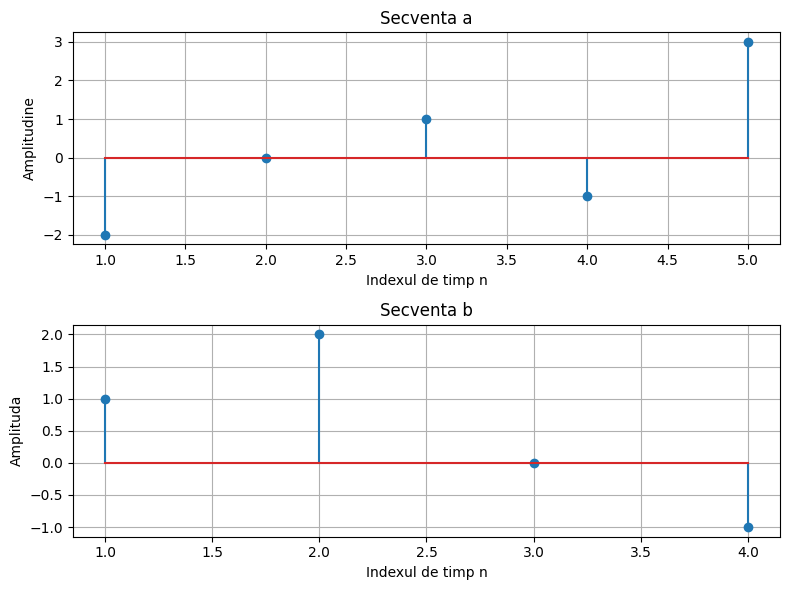

In [ ]:
#TASK 1
import numpy as np
import matplotlib.pyplot as plt

# Define the sequences
a = np.array([-2, 0, 1, -1, 3])
b = np.array([1, 2, 0, -1])

d = len(a)
c = len(b)

n = np.arange(1, d + 1)
l = np.arange(1, c + 1)

# Plot the sequences
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.stem(n, a)
plt.xlabel('Indexul de timp n')
plt.ylabel('Amplitudine')
plt.title('Secventa a')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(l, b)
plt.xlabel('Indexul de timp n')
plt.ylabel('Amplituda')
plt.title('Secventa b')
plt.grid()

plt.tight_layout()
plt.show()

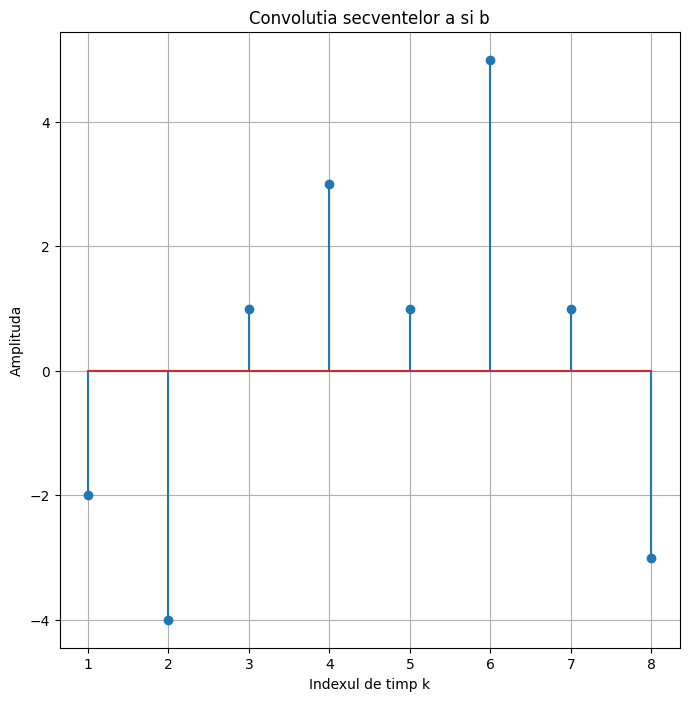

In [21]:
#TASK 2

# Compute convolution
conv_result = np.convolve(a, b)

# Define length of convolution result
m = d + c - 1
k = np.arange(1, m + 1)

# Plot the sequences
plt.figure(figsize=(8, 8))
plt.stem(k, conv_result)
plt.xlabel('Indexul de timp k')
plt.ylabel('Amplituda')
plt.title('Convolutia secventelor a si b')
plt.grid()

plt.show()

c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:3463: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


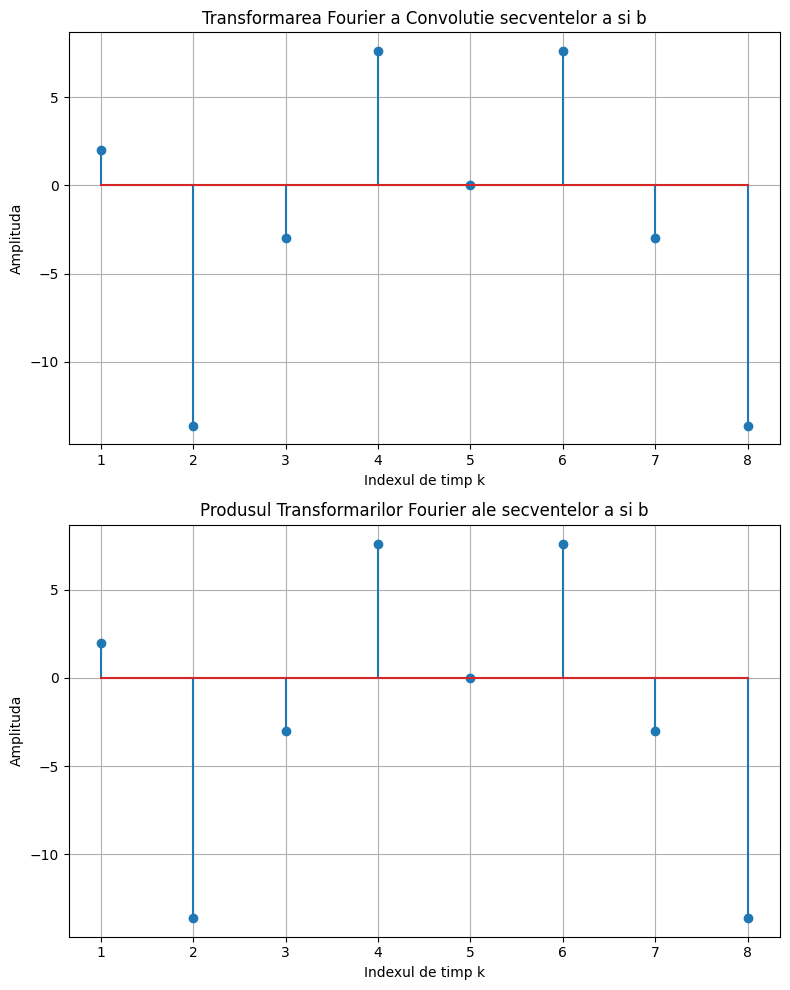

In [ ]:
#TASK 3

# Compute Fourier Transform of convolution result
conv_result_fft = np.fft.fft(conv_result, m)

# Compute Fourier Transform of sequences
AE = np.fft.fft(a, m)
BE = np.fft.fft(b, m)
p = AE * BE

# Plot the sequences
plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
plt.stem(k, conv_result_fft)
plt.xlabel('Indexul de timp k')
plt.ylabel('Amplituda')
plt.title('Transformarea Fourier a Convolutie secventelor a si b')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(k, np.real(p))
plt.xlabel('Indexul de timp k')
plt.ylabel('Amplituda')
plt.title('Produsul Transformarilor Fourier ale secventelor a si b')
plt.grid()


plt.tight_layout()
plt.show()

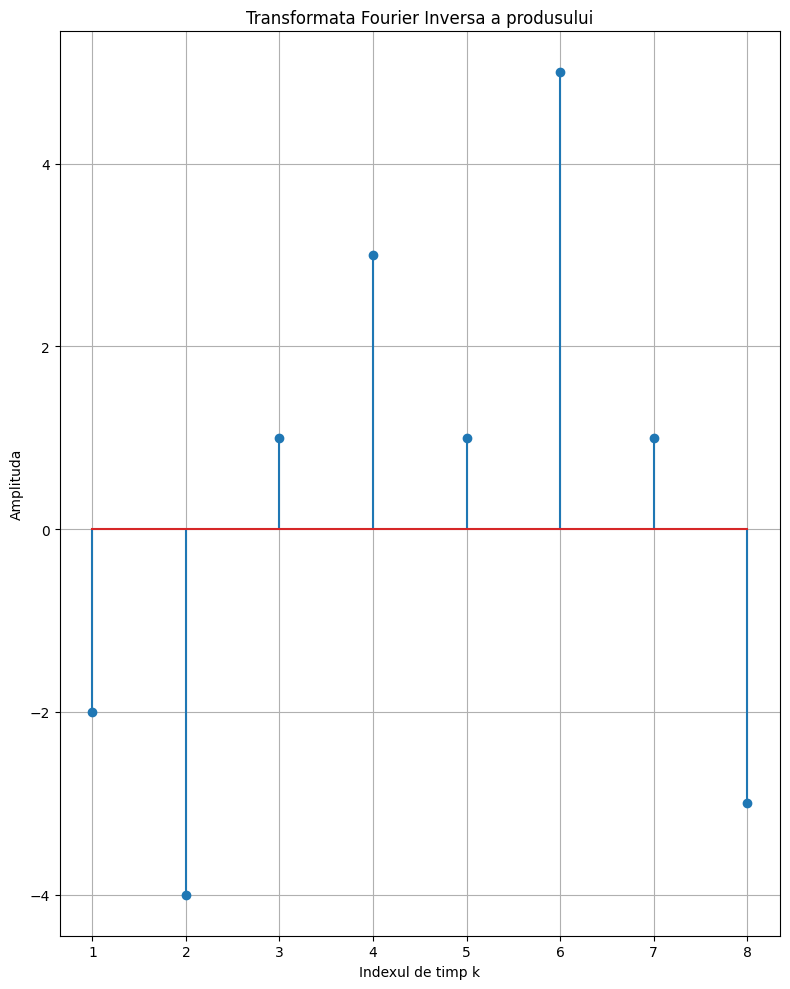

In [ ]:
#Task 4

# Compute inverse Fourier Transform to verify
ifft_result = np.fft.ifft(p)

# Plot the sequences
plt.figure(figsize=(8, 10))

plt.stem(k, np.real(ifft_result))
plt.xlabel('Indexul de timp k')
plt.ylabel('Amplituda')
plt.title('Transformata Fourier Inversa a produsului')
plt.grid()

plt.tight_layout()
plt.show()

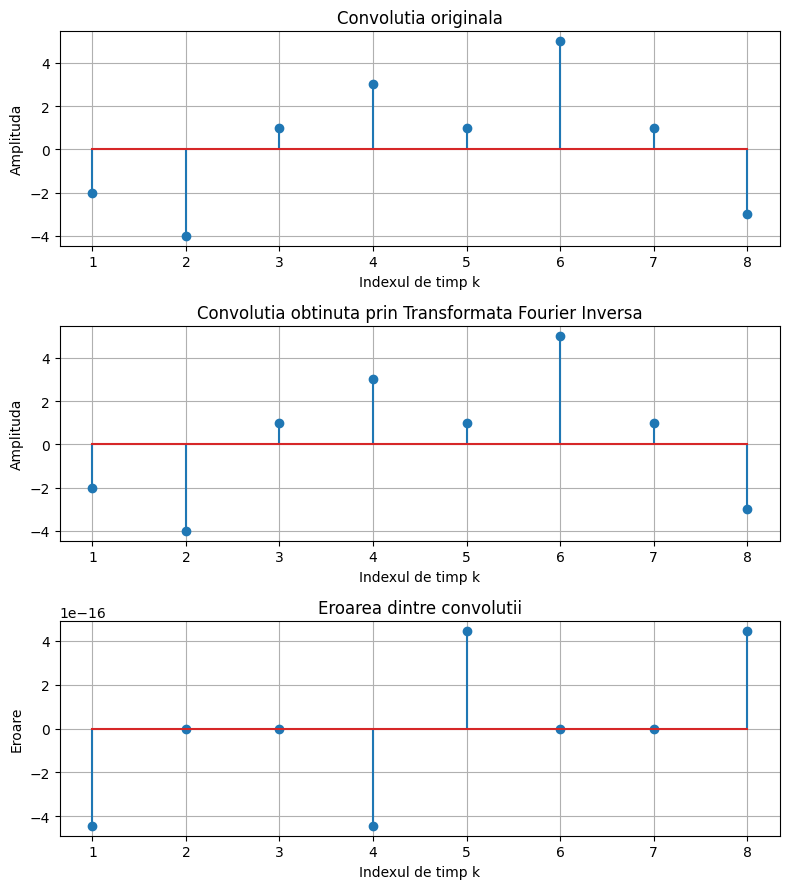

In [ ]:
#Task 5

# Compute error between convolution results
error = conv_result - np.real(ifft_result)

# Plot comparison of convolution results and error
plt.figure(figsize=(8, 9))

plt.subplot(3, 1, 1)
plt.stem(k, conv_result)
plt.xlabel('Indexul de timp k')
plt.ylabel('Amplituda')
plt.title('Convolutia originala')
plt.grid()

plt.subplot(3, 1, 2)
plt.stem(k, np.real(ifft_result))
plt.xlabel('Indexul de timp k')
plt.ylabel('Amplituda')
plt.title('Convolutia obtinuta prin Transformata Fourier Inversa')
plt.grid()

plt.subplot(3, 1, 3)
plt.stem(k, error)
plt.xlabel('Indexul de timp k')
plt.ylabel('Eroare')
plt.title('Eroarea dintre convolutii')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
#Task 6, 7

import time
from scipy.signal import square, sawtooth

N = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288] 
L = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288] 

for n in N:
    for l in L:
        a = 2 * square(20 * np.pi * np.arange(n) + 1)
        b = 3 * sawtooth(20 * np.pi * np.arange(l) + 1)
        
        # Compute convolution time
        tic = time.time()
        conv = np.convolve(a, b)
        toc = time.time()
        print(f'Timpul pentru convolutie directa: {toc - tic} secunde pentru N = {n} si L = {l}\n')

        # Compute Fourier Transform time
        m = n + l - 1
        tic = time.time()
        AE = np.fft.fft(a, m)
        BE = np.fft.fft(b, m)
        p = AE * BE
        ifft = np.fft.ifft(p)
        toc = time.time()
        print(f'Timpul pentru convolutie prin FFT: {toc - tic} secunde pentru N = {n} si L = {l}\n')


Timpul pentru convolutie directa: 3.743171691894531e-05 secunde pentru N = 16 si L = 16
Timpul pentru convolutie prin FFT: 0.029223918914794922 secunde pentru N = 16 si L = 16
Timpul pentru convolutie directa: 5.435943603515625e-05 secunde pentru N = 16 si L = 32
Timpul pentru convolutie prin FFT: 0.0001971721649169922 secunde pentru N = 16 si L = 32
Timpul pentru convolutie directa: 1.811981201171875e-05 secunde pentru N = 16 si L = 64
Timpul pentru convolutie prin FFT: 8.344650268554688e-05 secunde pentru N = 16 si L = 64
Timpul pentru convolutie directa: 1.3828277587890625e-05 secunde pentru N = 16 si L = 128
Timpul pentru convolutie prin FFT: 0.00015664100646972656 secunde pentru N = 16 si L = 128
Timpul pentru convolutie directa: 1.7404556274414062e-05 secunde pentru N = 16 si L = 256
Timpul pentru convolutie prin FFT: 0.0012888908386230469 secunde pentru N = 16 si L = 256
Timpul pentru convolutie directa: 2.1457672119140625e-05 secunde pentru N = 16 si L = 512
Timpul pentru convo

Timpul pentru convolutie directa: 5.626678466796875e-05 secunde pentru N = 16 si L = 16
Timpul pentru convolutie prin FFT: 0.0002200603485107422 secunde pentru N = 16 si L = 16


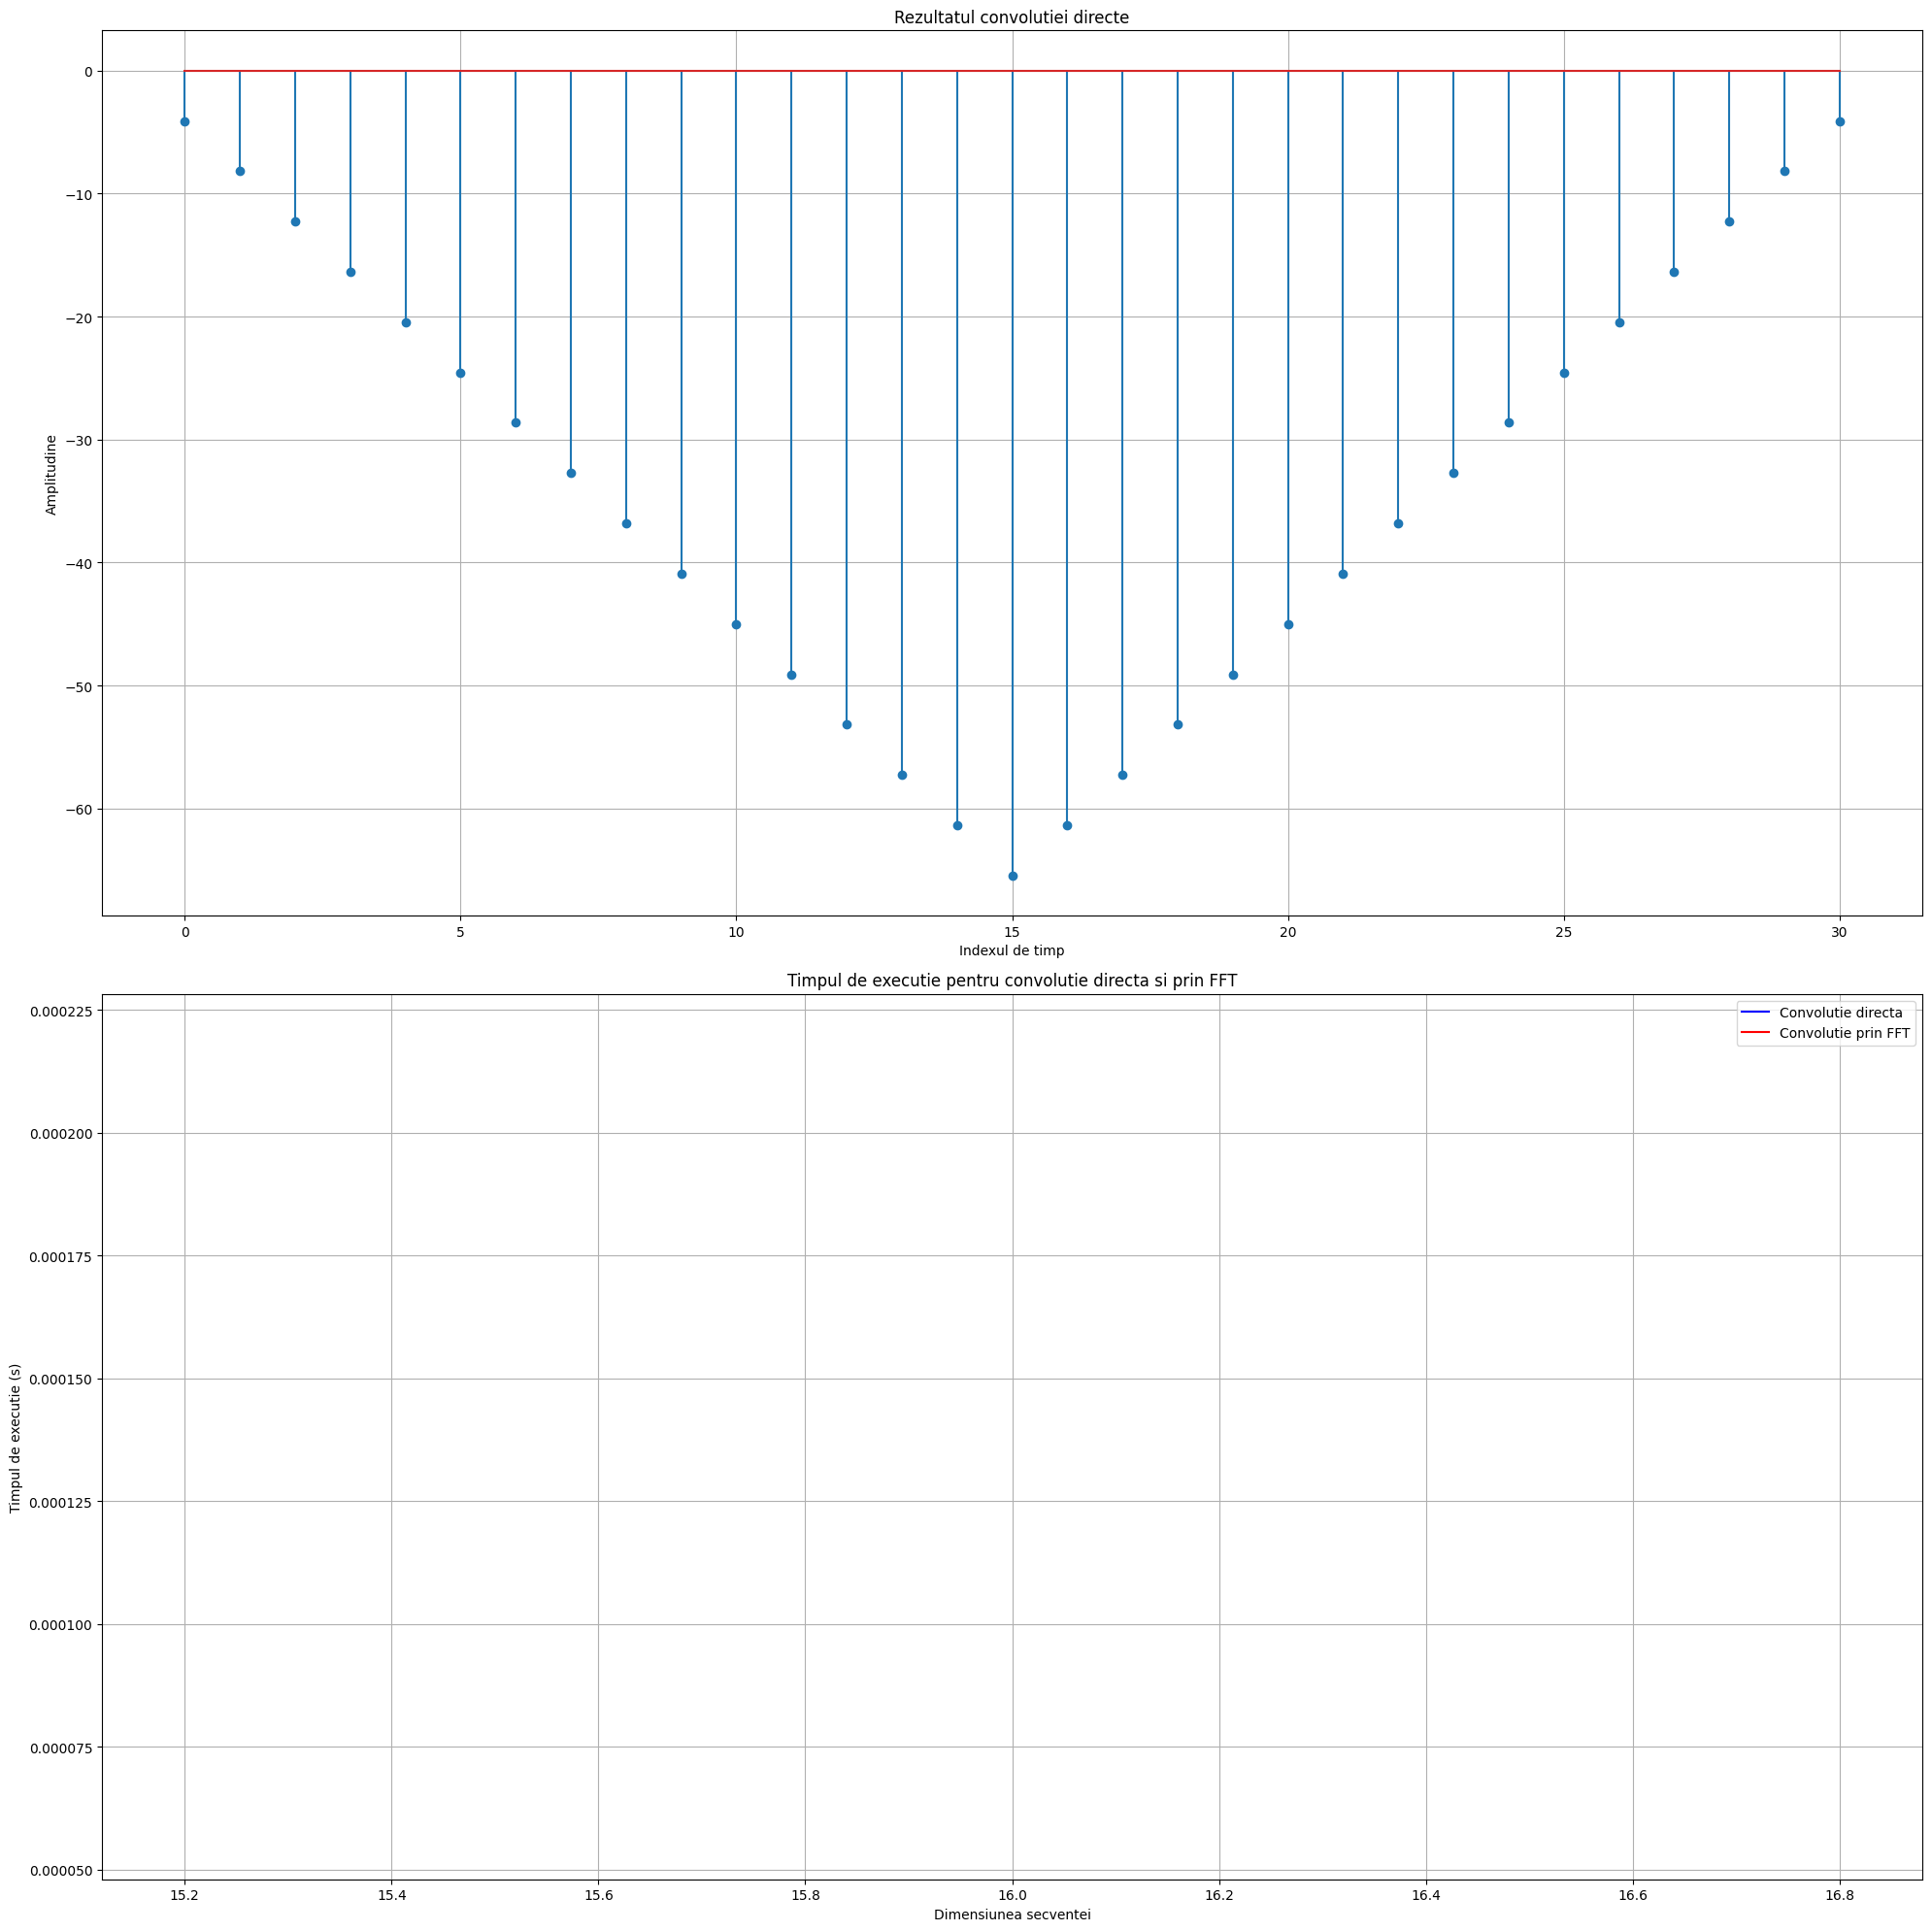

Timpul pentru convolutie directa: 4.267692565917969e-05 secunde pentru N = 32 si L = 32
Timpul pentru convolutie prin FFT: 0.0003027915954589844 secunde pentru N = 32 si L = 32


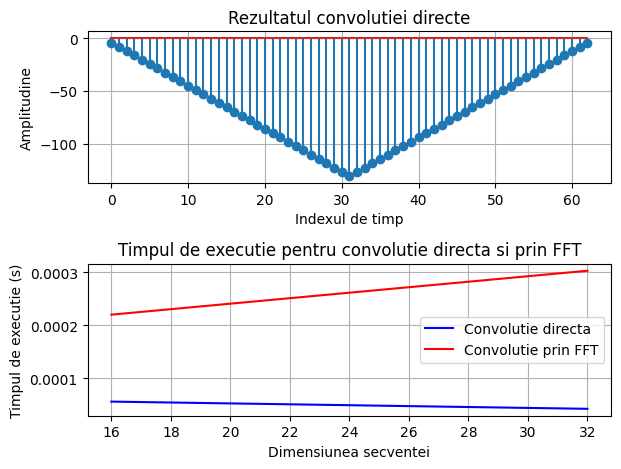

Timpul pentru convolutie directa: 4.863739013671875e-05 secunde pentru N = 64 si L = 64
Timpul pentru convolutie prin FFT: 0.00029397010803222656 secunde pentru N = 64 si L = 64


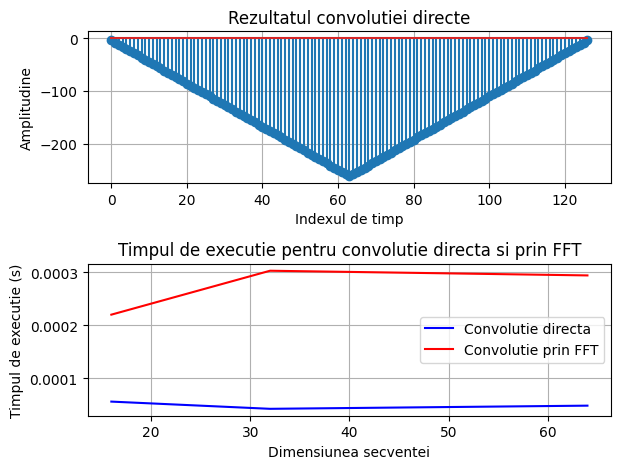

Timpul pentru convolutie directa: 3.075599670410156e-05 secunde pentru N = 128 si L = 128
Timpul pentru convolutie prin FFT: 0.00014853477478027344 secunde pentru N = 128 si L = 128


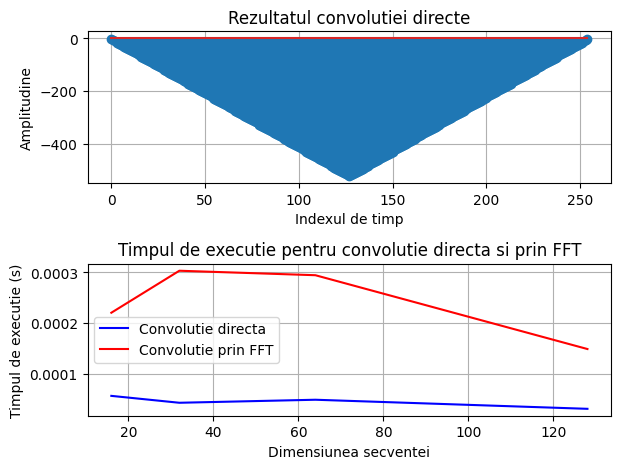

Timpul pentru convolutie directa: 5.5789947509765625e-05 secunde pentru N = 256 si L = 256
Timpul pentru convolutie prin FFT: 0.0002422332763671875 secunde pentru N = 256 si L = 256


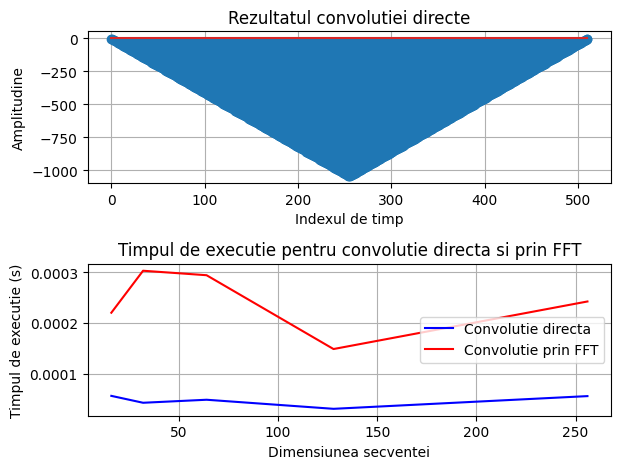

Timpul pentru convolutie directa: 0.00017261505126953125 secunde pentru N = 512 si L = 512
Timpul pentru convolutie prin FFT: 0.03216052055358887 secunde pentru N = 512 si L = 512


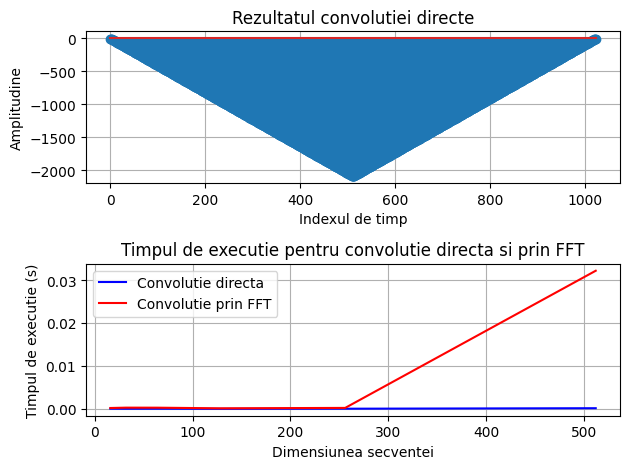

Timpul pentru convolutie directa: 0.0002665519714355469 secunde pentru N = 1024 si L = 1024
Timpul pentru convolutie prin FFT: 0.0006117820739746094 secunde pentru N = 1024 si L = 1024


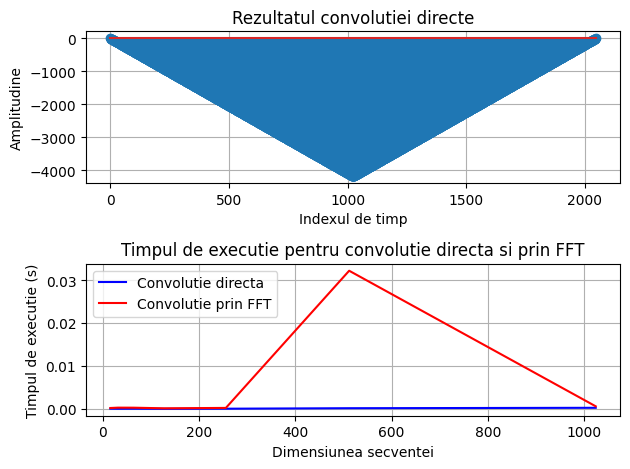

Timpul pentru convolutie directa: 0.0009107589721679688 secunde pentru N = 2048 si L = 2048
Timpul pentru convolutie prin FFT: 0.0005204677581787109 secunde pentru N = 2048 si L = 2048


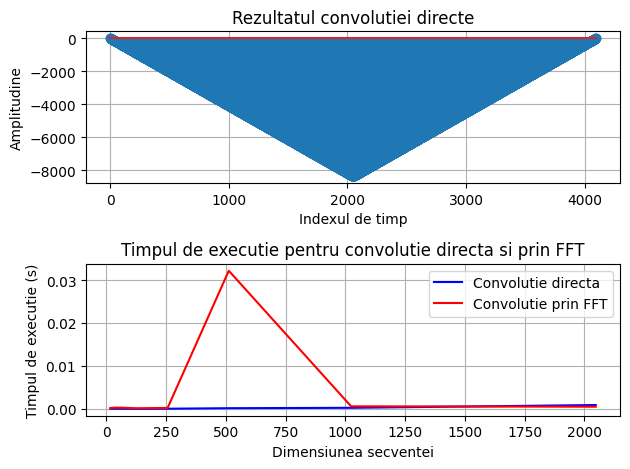

Timpul pentru convolutie directa: 0.0017452239990234375 secunde pentru N = 4096 si L = 4096
Timpul pentru convolutie prin FFT: 0.0015518665313720703 secunde pentru N = 4096 si L = 4096


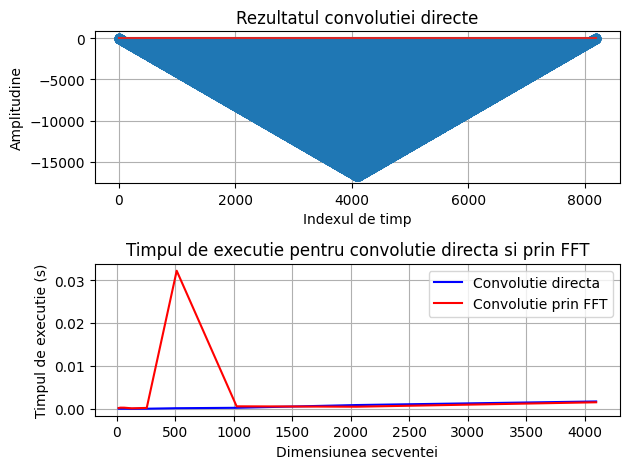

Timpul pentru convolutie directa: 0.006844282150268555 secunde pentru N = 8192 si L = 8192
Timpul pentru convolutie prin FFT: 0.0023183822631835938 secunde pentru N = 8192 si L = 8192


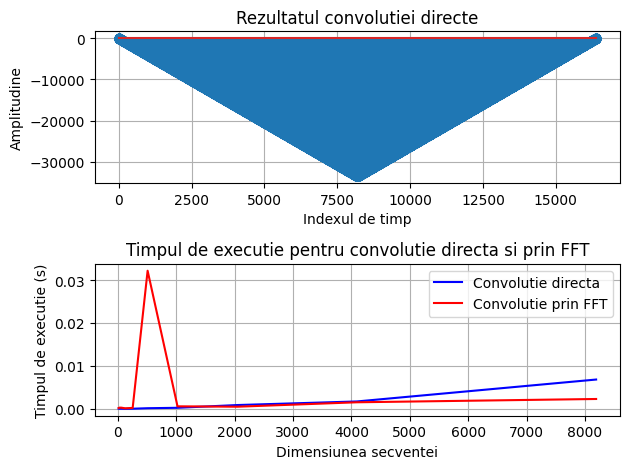

Timpul pentru convolutie directa: 2.0301363468170166 secunde pentru N = 16384 si L = 16384
Timpul pentru convolutie prin FFT: 0.006056308746337891 secunde pentru N = 16384 si L = 16384


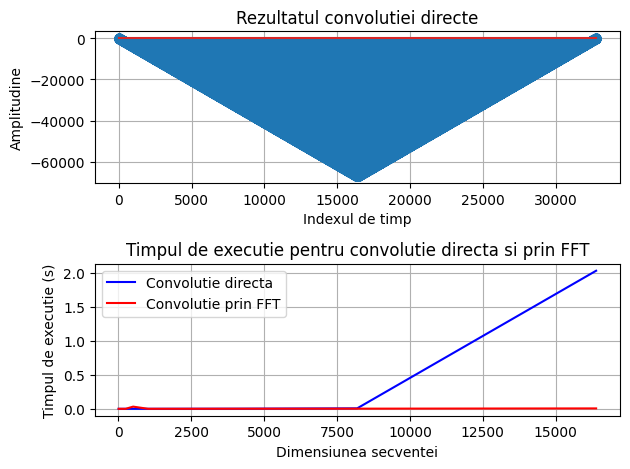

Timpul pentru convolutie directa: 9.21169900894165 secunde pentru N = 32768 si L = 32768
Timpul pentru convolutie prin FFT: 0.034094810485839844 secunde pentru N = 32768 si L = 32768


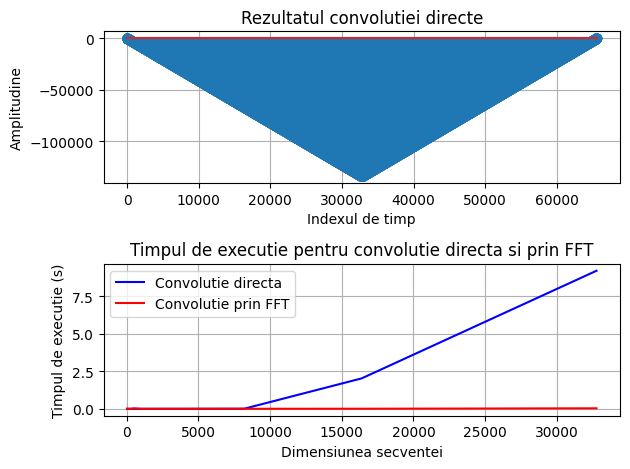

Timpul pentru convolutie directa: 22.035715103149414 secunde pentru N = 65536 si L = 65536
Timpul pentru convolutie prin FFT: 0.05417776107788086 secunde pentru N = 65536 si L = 65536


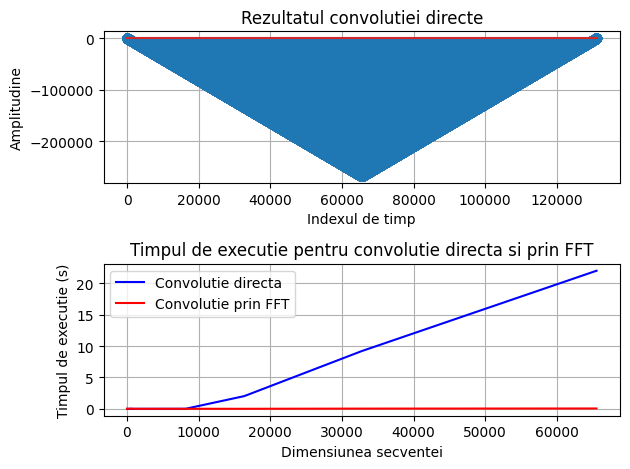

Timpul pentru convolutie directa: 56.987982988357544 secunde pentru N = 131072 si L = 131072
Timpul pentru convolutie prin FFT: 0.04238271713256836 secunde pentru N = 131072 si L = 131072


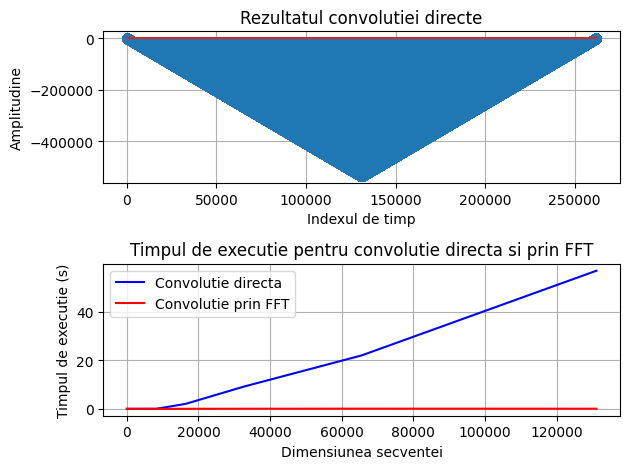

Timpul pentru convolutie directa: 135.88212823867798 secunde pentru N = 262144 si L = 262144
Timpul pentru convolutie prin FFT: 0.3767204284667969 secunde pentru N = 262144 si L = 262144


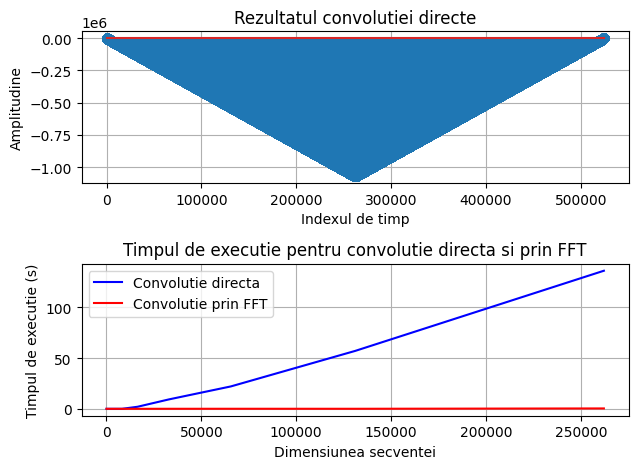

Timpul pentru convolutie directa: 205.45371532440186 secunde pentru N = 524288 si L = 524288
Timpul pentru convolutie prin FFT: 0.20438766479492188 secunde pentru N = 524288 si L = 524288


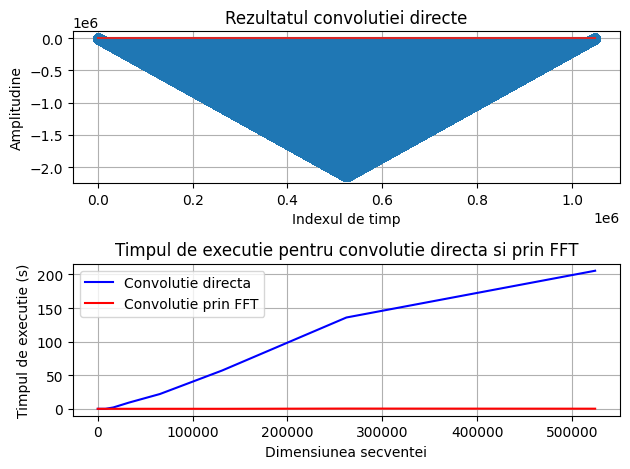

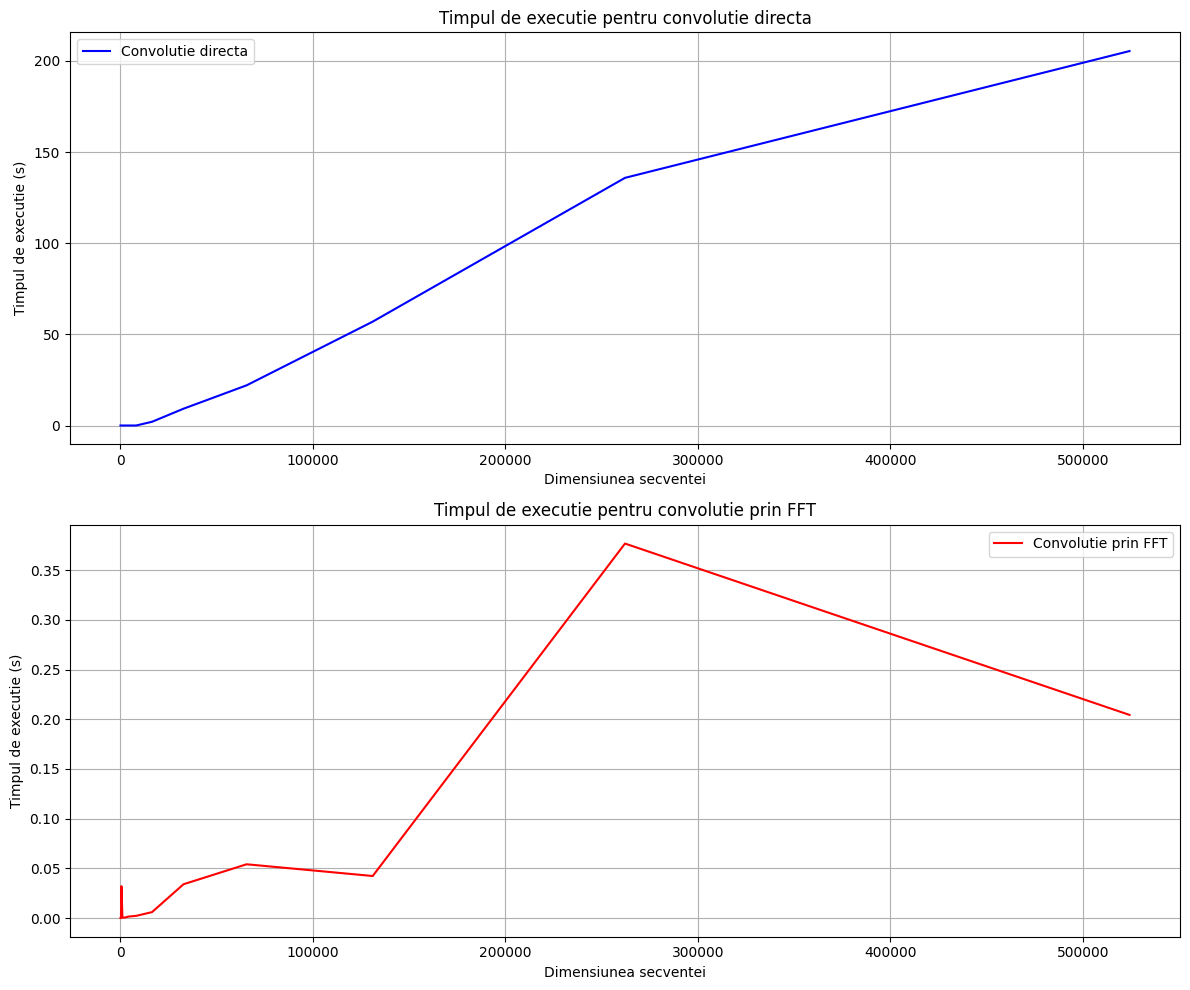

In [11]:
#Task 6, 7

import time
from scipy.signal import square, sawtooth
import matplotlib.pyplot as plt
import numpy as np

n_s = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288]  
conv_time = []
fft_time = []

plt.figure(figsize=(20, 20))

for n in n_s:
    N = n
    L = n
    a = 2 * square(20 * np.pi * np.arange(N) + 1)
    b = 3 * sawtooth(20 * np.pi * np.arange(L) + 1)
        
    # Compute convolution time
    tic = time.time()
    conv = np.convolve(a, b)
    toc = time.time()
    print(f'Timpul pentru convolutie directa: {toc - tic} secunde pentru N = {N} si L = {L}')
    conv_time.append(toc - tic)
    
    # Compute Fourier Transform time
    m = n + L - 1
    tic = time.time()
    AE = np.fft.fft(a, m)
    BE = np.fft.fft(b, m)
    p = AE * BE
    ifft = np.fft.ifft(p)
    toc = time.time()
    fft_time.append(toc - tic)
    print(f'Timpul pentru convolutie prin FFT: {toc - tic} secunde pentru N = {N} si L = {L}')

    # Plot the results dynamically
    plt.clf()

    # Subplot for direct convolution result
    plt.subplot(2, 1, 1)
    plt.stem(np.arange(len(conv)), conv)
    plt.xlabel('Indexul de timp')
    plt.ylabel('Amplitudine')
    plt.title('Rezultatul convolutiei directe')
    plt.grid()

    # Subplot for execution times
    plt.subplot(2, 1, 2)
    plt.plot(n_s[:len(conv_time)], conv_time, label='Convolutie directa', color='blue')
    plt.plot(n_s[:len(fft_time)], fft_time, label='Convolutie prin FFT', color='red')
    plt.xlabel('Dimensiunea secventei')
    plt.ylabel('Timpul de executie (s)')
    plt.title('Timpul de executie pentru convolutie directa si prin FFT')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.pause(0.1)  # Pause to update the plot

plt.show()


# Plot the results
plt.figure(figsize=(12, 10))

# Subplot for direct convolution time
plt.subplot(2, 1, 1)
plt.plot(n_s, conv_time, label='Convolutie directa', color='blue')
plt.xlabel('Dimensiunea secventei')
plt.ylabel('Timpul de executie (s)')
plt.title('Timpul de executie pentru convolutie directa')
plt.legend()
plt.grid()

# Subplot for FFT convolution time
plt.subplot(2, 1, 2)
plt.plot(n_s, fft_time, label='Convolutie prin FFT', color='red')
plt.xlabel('Dimensiunea secventei')
plt.ylabel('Timpul de executie (s)')
plt.title('Timpul de executie pentru convolutie prin FFT')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Convolutie pe blocuri: [ 1.  6. 13. 20. 27. 32. 29. 23. 20. 16. 13.  9.  6.  2.]


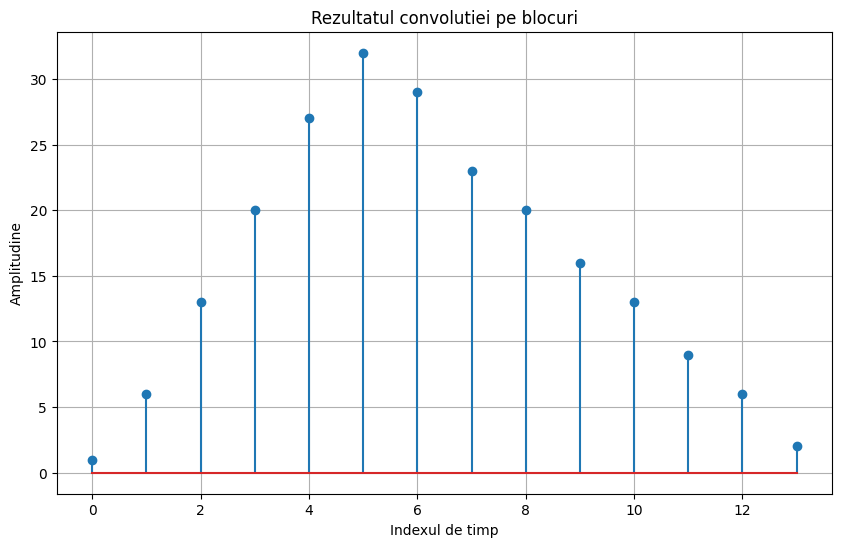

In [ ]:
#Task 8

def block_convolution(a, b, block_size):
    result = np.zeros(len(a) + len(b) - 1)
    for i in range(0, len(a), block_size):
        a_block = a[i:i + block_size]
        temp_result = np.convolve(a_block, b)
        result[i:i + len(temp_result)] += temp_result
    return result

# Define the sequences
a = np.array([1, 4, 2])
b = np.array([1, 2, 3, 4, 5, 4, 3, 3, 2, 2, 1, 1])

# Compute block convolution
conv_block = block_convolution(a, b, block_size=3)
print(f'Convolutie pe blocuri: {conv_block}')

# Plot the block convolution result
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(conv_block)), conv_block)
plt.xlabel('Indexul de timp')
plt.ylabel('Amplitudine')
plt.title('Rezultatul convolutiei pe blocuri')
plt.grid()
plt.show()

Bloc 1: [1 2 3 4 5 4]
Convolutie bloc 1: [ 1  6 13 20 27 32 26  8]

Bloc 2: [3 3 2 2 1 1]
Convolutie bloc 2: [ 3 15 20 16 13  9  6  2]


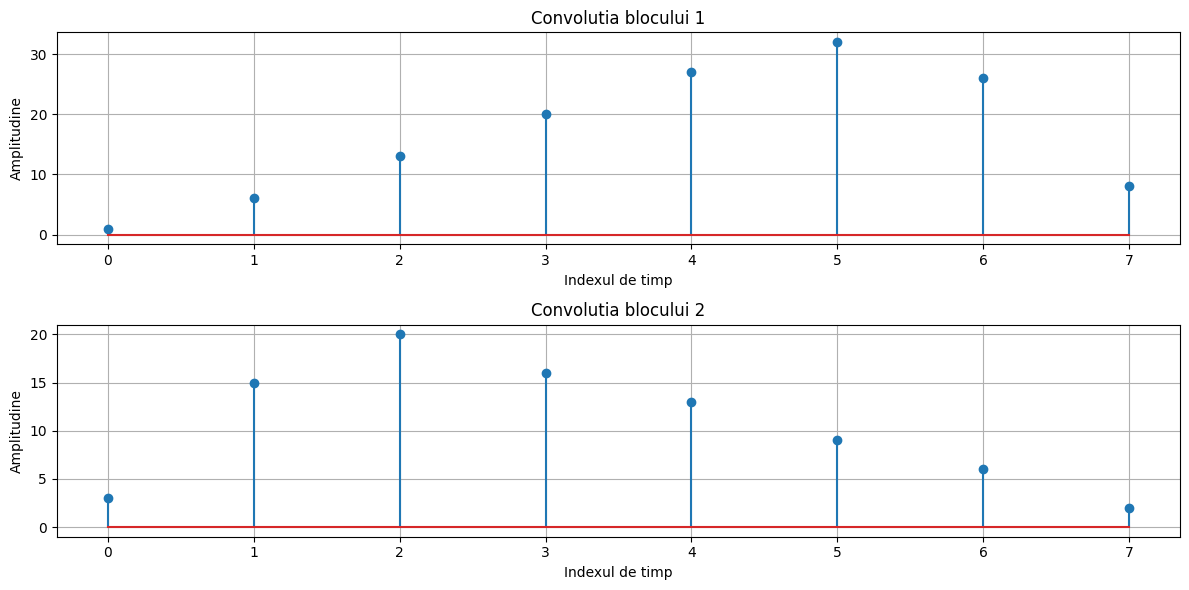

In [45]:
#Task 9

# Define the sequences
a = np.array([1, 2, 3, 4, 5, 4, 3, 3, 2, 2, 1, 1])
b = np.array([1, 4, 2])

# Split input signal into two blocks
a1 = a[:6]
a2 = a[6:]

# Compute convolutions separately
c1 = np.convolve(a1, b)
c2 = np.convolve(a2, b)

print(f'Bloc 1: {a1}')
print(f'Convolutie bloc 1: {c1}\n')

print(f'Bloc 2: {a2}')
print(f'Convolutie bloc 2: {c2}')

# Plot the convolutions
plt.figure(figsize=(12, 6))

# Subplot for the first block convolution
plt.subplot(2, 1, 1)
plt.stem(np.arange(len(c1)), c1)
plt.xlabel('Indexul de timp')
plt.ylabel('Amplitudine')
plt.title('Convolutia blocului 1')
plt.grid()

# Subplot for the second block convolution
plt.subplot(2, 1, 2)
plt.stem(np.arange(len(c2)), c2)
plt.xlabel('Indexul de timp')
plt.ylabel('Amplitudine')
plt.title('Convolutia blocului 2')
plt.grid()

plt.tight_layout()
plt.show()

Convolutie finala: [ 1  6 13 20 27 32 29 23 20 16 13  9  6  2]


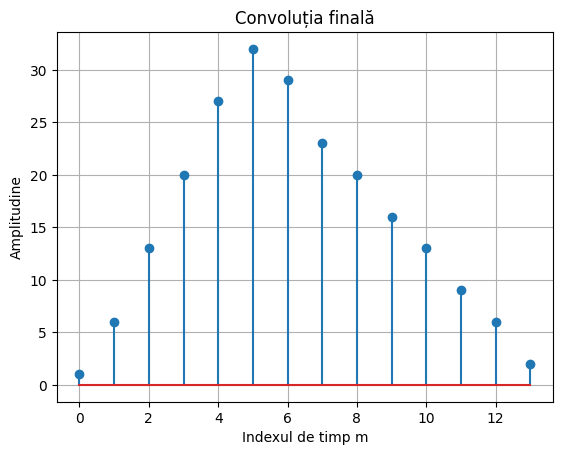

In [47]:
# Compute final convolution
c_add = np.concatenate([c1[:6], c1[6:8] + c2[:2], c2[2:]])
print(f'Convolutie finala: {c_add}')

# Display results
m = np.arange(len(c_add))
plt.stem(m, c_add)
plt.xlabel('Indexul de timp m')
plt.ylabel('Amplitudine')
plt.title('Convoluția finală')
plt.grid()

plt.show()


In [48]:
#Task 11

# Define the sequences
h = np.array([1, 2, 3])
s = np.array([4, 5, 6, 7])

d = len(h)
c = len(s)

n = np.arange(1, d + 1)
l = np.arange(1, c + 1)

# Compute convolution
conv_result = np.convolve(h, s)

print(f'Convolutia secventelor h si s: {conv_result}')

Convolutia secventelor h si s: [ 4 13 28 34 32 21]


In [54]:
#Task 12

np.set_printoptions(suppress=True)  # Disable scientific notation

# Define input sequences
h = np.array([1, 2, 3, 0, 0, 0, 0, 0])  # Impulse response
s = np.array([4, 5, 6, 7, 0, 0, 0, 0])  # Input signal

# Compute FFT
H = np.fft.fft(h)
S = np.fft.fft(s)

# Perform element-wise multiplication in frequency domain
P = H * S

# Compute Inverse FFT (IFFT) to get the convolution result
conv_result = np.fft.ifft(P).real  # Taking real part

# Display the result
print("Convolution Result:", conv_result[0 : 6])

np.set_printoptions(suppress=False)  # Disable scientific notation
print(conv_result[7])


Convolution Result: [ 4. 13. 28. 34. 32. 21.]
-3.552713678800501e-15
